<!--HEADER-->
*Notas de aula de Modelagem Matemática - 2021/1 [- Ricardo M. S. Rosa (IM/UFRJ)](http://www.im.ufrj.br/rrosa)*

<!--BADGES-->
<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2021p1/notas_de_aula/05.02-Minimos_quadrados_verossimilhanca.ipynb" target="_blank"><img align="left" src="https://img.shields.io/badge/view%20in-nbviewer-orange" alt="View in NBViewer" title="View in NBViewer"></a><a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/julia-env-for-binder-2021p1?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Frmsrosa%252Fmodelagem_matematica%26branch%3Dmodmat2021p1%26urlpath%3Dtree%252Fmodelagem_matematica%252Fnotas_de_aula/05.02-Minimos_quadrados_verossimilhanca.ipynb" target="_blank"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open in binder"></a><a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2021p1/notas_de_aula/slides/05.02-Minimos_quadrados_verossimilhanca.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/view-slides-darkgreen" alt="View Slides" title="View Slides"></a>&nbsp;

<!--NAVIGATOR-->
[<- 5.1. Erros e incertezas](05.01-Erros_e_incertezas.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [5.3. Propagação de incertezas ->](05.03-Propagacao_incertezas.ipynb)

---


# Mínimos quadrados, maximização da verossimilhança e quantificação de incertezas em regressões lineares

* Continuando o assunto de probabilidade, vamos ver o problema de mínimos quadrados linear como um problema de maximização da verossimilhança.

* Os dois métodos são equivalentes, quando a distribuição de probabilidade do erro das amostras é normal.

* Mas a verossimilhança envolve uma interpretação diferente do problema, com aspectos probabilísticos.

* Como consequência, podemos quantificar as incertezas na escolha dos parâmetros e nas predições do modelo.

In [1]:
using Distributions
using Plots
using Random
using LinearAlgebra: ⋅

## Hipóteses probabilísticas

* Consideremos um modelo linear 
$$ y = \beta_0  + \beta_1 x
$$

* De um ponto de vista probabilístico, consideramos incertezas inerentes na obtenção dos dados $x$ e na definição do modelo.

* Com base nisso, interpretamos o modelo como uma relação para o **valor esperado** de $y$, **dado** $x$, i.e.
$$ E(y|x) = \beta_0  + \beta_1 x
$$

* Tanto $y$ como o erro $\epsilon = y - \beta_0  + \beta_1 x$ são vistos como variáveis aleatórias e assume-se que o erro segue uma normal, com o mesmo desvio padrão ao longo da variável $x$:
$$ \epsilon \sim \mathcal{N}(0,\sigma^2).
$$

* Assim, a probabilidade condicional de $y$ dado $x$ é
$$ \mathcal{P}(y|x) \sim \mathcal{N}(\beta_0 + \beta_1 x, \sigma^2).
$$

* Além disso, assumimos que os erros são independentes entre si. Ou seja, em quaisquer dois pontos $x_i, x_j$, os erros $\epsilon_i, \epsilon_j$ nesses pontos são independentes entre si, ou seja, não são correlacionados, o que pode ser expresso por $E(\epsilon_i\epsilon_j)=0$.

## Verossimilhança

* A função densidade de probabilidade da normal $\mathcal{N}(\mu, \sigma)$ é
$$ f_{\mu, \sigma^2}(s) = \frac{1}{\displaystyle \sqrt{2\pi \sigma^2}}e^{\displaystyle -\frac{(s-\mu)^2}{2\sigma^2}}.
$$

* No caso de $\mathcal{P}(y|x) \sim \mathcal{N}(\beta_0 + \beta_1 x, \sigma^2)$, e considerando $\sigma$ fixo, a função densidade de probabilidade de $\mathcal{P}(y|x)$, que depende de $\boldsymbol\beta = (\beta_0, \beta_1)$, se torna
$$ f_\beta(y) = \frac{1}{\displaystyle \sqrt{2\pi \sigma^2}}e^{\displaystyle -\frac{(y - \beta_0 - \beta_1 x)^2}{2\sigma^2}}.
$$

* Olhando essa função de maneira diferente, em um dado valor observado $y$ (para um certo $x$ fixo), e com o parâmetro $\boldsymbol\beta$ variável, temos a **função de verossimilhança**
$$ \mathcal{L}_y(\boldsymbol\beta) = f_{\boldsymbol\beta}(y) = \frac{1}{\displaystyle \sqrt{2\pi \sigma^2}}e^{\displaystyle -\frac{(y - \beta_0 - \beta_1 x)^2}{2\sigma^2}}.
$$

* Observe que quanto mais perto $\beta_0 + \beta_1 x$ estiver de $y$, maior será a verossimilhança.

* Mas independentemente da forma da função de densidade de distribuição, maximizar a verossimilhança é aumentar a probabilidade do modelo resultar no dado observado.

## Função de verossimilhança em um conjunto de observações

* Dado um conjunto de observações $(\mathbf{x}, \mathbf{y}) = (x_i, y_i)_{i=1}^N$, a probabilidade conjunta é o produto das probabilidades, $\mathcal{P}(y_1|x_1)\cdot\mathcal{P}(y_n|x_n)$.

* Em relação à função densidade de probabilidades, obtemos
$$ f_n(\mathbf{y},\boldsymbol\beta) = \frac{1}{\displaystyle (2\pi \sigma^2)^{n/2}}e^{\displaystyle -\frac{1}{2\sigma^2}\sum_{i=1}^N(y_i - \beta_0 - \beta_1 x_i)^2}.
$$

* A função de verossimilhança da amostra é
$$ \mathcal{L}_N(\boldsymbol\beta) = \Pi_i \mathcal{L}_{y_i}(\boldsymbol\beta) = f_n(\mathbf{y},\boldsymbol\beta) = \frac{1}{\displaystyle (2\pi \sigma^2)^{n/2}}e^{\displaystyle -\frac{1}{2\sigma^2}\sum_{i=1}^N(y_i - \beta_0 - \beta_1 x_i)^2}.
$$

* Maximizar $\mathcal{L}_N(\boldsymbol\beta)$ é aumentar a probabilidade do modelo resultar numa boa aproximação para o conjunto de dados observados.

## Função de log-verossimilhança

* Obtivemos a função de verossimilhança "pontual"
$$ \mathcal{L}_y(\boldsymbol\beta) = \frac{1}{\displaystyle \sqrt{2\pi \sigma^2}}e^{\displaystyle -\frac{(y - \beta_0 - \beta_1 x)^2}{2\sigma^2}}.
$$

* Associada a ela, temos a **função de log-verossimilhança**
$$ \ell_y(\boldsymbol\beta) = \log(\mathcal{L}_y(\boldsymbol\beta) = \log\left(\frac{1}{\displaystyle \sqrt{2\pi \sigma^2}}\right) - \frac{(y - \beta_0 - \beta_1 x)^2}{2\sigma^2}.
$$

* Como o logaritmo é monónoto crescente, maximizar a verossimilhança é equivalente a maximizar a log-verossimilhança.

* No caso da normal, vemos que a log-verossimilhança tem uma dependência bem mais amigável, no sentido de ser linear.

* No caso de um conjunto de dados, a função de log-verossimilhança toma a forma
$$ \ell_N(\boldsymbol\beta) = \log \mathcal{L}_N(\boldsymbol\beta) = N\log\left(\frac{1}{\displaystyle \sqrt{2\pi \sigma^2}}\right) - \frac{1}{2\sigma^2}\sum_{i=1}^N (y_i - \beta_0 - \beta_1 x_i)^2.
$$

## Maximização da verossimilhança e minimização do erro quadrático

* Chegamos, então, a
$$ \ell_N(\boldsymbol\beta) = N\log\left(\frac{1}{\displaystyle \sqrt{2\pi \sigma^2}}\right) - \frac{1}{2\sigma^2}\sum_{i=1}^N (y - \beta_0 - \beta_1 x)^2.
$$

* O primeiro termo não depende de $\boldsymbol\beta$.

* E vemos, do segundo termo, que maximizar a verossimilhança é equivalente a minimizar o erro quadrático (i.e. a soma dos quadrados dos resíduos (RSS))
$$ \operatorname{RSS}(\boldsymbol\beta) = \sum_{i=1}^N (y - \beta_0 - \beta_1 x)^2.
$$

* Dessa forma, estabelecemos a equivalência entre os dois métodos (mas com interpretações diferentes):
$$ \hat{\boldsymbol\beta} = \operatorname{argmax}_{\boldsymbol\beta} \mathcal{L}_N(\boldsymbol\beta) = \operatorname{argmax}_{\boldsymbol\beta} \ell_N(\boldsymbol\beta) = \operatorname{argmin}_{\boldsymbol\beta} \operatorname{RSS}(\boldsymbol\beta).
$$

* Essa equivalência vale quando o erro é uma normal, com média zero, e desvio padrão uniforme ao longo de $x$.

## Estimativa sobre a determinação nos parâmetros

* Com esse arcabouço probabilístico, podemos extrair informações sobre a incerteza na determinação dos parâmetros $\boldsymbol\beta=(\beta_0, \beta_1)$. 

* Obtivemos, acima, o maximizador da verossimilhança $\hat{\boldsymbol\beta}$ dado exatamente pela forma normal da solução pelo método de mínimos quadrados:
$$ \hat{\boldsymbol\beta} = (X^TX)^{-1}X^T\mathbf{y}.
$$

* Nesta fórmula,  $X = [\mathbf{1}, \mathbf{x}]$ é a matrix de Vandermonde, que assumimos de posto máximo, e $\mathbf{y}$ é dado por $\mathbf{y} = (y_1, \ldots, y_N)$

* Agora, ao invés de olharmos estritamente para $\boldsymbol\beta$ que minimiza o erro entre as medições $y_i$ e o do resultado do modelo $\beta_0 + \beta_1 x_i$, vamos olhar para possíveis outras escolhas $\mathbf{y} = X\mathbf{\boldsymbol\beta} + \boldsymbol{\epsilon}$, que talvez extrapolassem melhor $y = \beta_0 + \beta_1 x$ para outros dados.

* Considerando, então, $\mathbf{y} = X\mathbf{\boldsymbol\beta} + \boldsymbol{\epsilon}$, obtemos
$$ \hat{\boldsymbol\beta} = (X^TX)^{-1}X^T(X\boldsymbol\beta + \boldsymbol{\epsilon}) = \boldsymbol\beta + (X^TX)^{-1}X^T\boldsymbol{\epsilon}.
$$

* Logo, $\boldsymbol\beta$ é uma variável aleatória cuja diferença para o maximizador $\hat{\boldsymbol\beta}$ é dada por
$$ \boldsymbol\beta - \hat{\boldsymbol\beta} = - (X^TX)^{-1}X^T\boldsymbol{\epsilon}.
$$

## Variância na determinação dos parâmetros

* Como $\hat{\boldsymbol\beta}$ está fixo (constante), temos $E(\hat{\boldsymbol\beta}) = \hat{\boldsymbol\beta}$, de modo que $\operatorname{Var}(\boldsymbol\beta) = \operatorname{Var}(\boldsymbol\beta - \hat{\boldsymbol\beta}) = \operatorname{Var}(\hat{\boldsymbol\beta}-\boldsymbol\beta)$ (verifique!). Portanto,
$$ \operatorname{Var}(\boldsymbol\beta) = \operatorname{Var}\left((X^TX)^{-1}X^T\boldsymbol{\epsilon}\right).
$$

* Se $X$ e $\epsilon$ fossem escalares, seria fácil deduzir que $\operatorname{Var}(\beta) = (X^TX)^{-1}X^T\operatorname{Var}(\epsilon)X(X^TX)^{-1}$. Mas não é o caso.

* No caso multidimensional, em que $X$ é de fato uma matriz e $\boldsymbol\epsilon$ e $\boldsymbol\beta$ são vetores, temos o valor esperado nos dando um vetor com os valores esperados de cada coordenada e temos a variância sendo estendida a uma **matrix de variância-covariância**, nos dando não apenas a variação de cada coordenada, mas também uma variação conjunto entre cada par de coordenadas. E a variância de $\boldsymbol\beta$ envolve tudo isso.

## Valor esperado e variância-covariância de variáveis aleatórias multidimensionais

* Por exemplo, se $\boldsymbol\beta=(\beta_1, \ldots, \beta_m)$ é uma variável aleatória multidimensional, então o **valor esperado** (ou média) é
$$ E(\boldsymbol\beta) = (E(\beta_1), \ldots, E(\beta_m)).
$$

* Também podemos considerar a **variância** de cada coordenada, $\operatorname{Var}(\beta_i) = E((\beta_i - E(\beta_i))^2)$, nos dando o vetor variância
$$ \operatorname{Var}(\boldsymbol\beta) = (\operatorname{Var}(\beta_1), \ldots, \operatorname{Var}(\beta_m)).
$$

* Mas também é relevante levarmos em consideração a **covariância** entre as coordenadas, $$\operatorname{Cov}(\beta_j, \beta_k) = E((\beta_j - E(\beta_j))(\beta_k - E(\beta_k))).
$$

* Naturalmente, $\operatorname{Cov}(\beta_i, \beta_i) = \operatorname{Var}(\beta_i)$.

* Juntando os dois conceitos, temos a **matriz de variância-covariância**
$$ \operatorname{Cov}(\boldsymbol\beta) = \operatorname{Cov}.(\mathbf{\beta}, \mathbf{\beta}^T) = \left[ \begin{matrix} 
  \operatorname{Var}(\beta_1) & \operatorname{Cov}(\beta_1, \beta_2) & \ldots & \operatorname{Cov}(\beta_1, \beta_m) \\
  \operatorname{Cov}(\beta_2, \beta_1) & \operatorname{Var}(\beta_2)& \dots & \operatorname{Cov}(\beta_2, \beta_m) \\
  \vdots & \vdots & \vdots & \vdots \\
  \operatorname{Cov}(\beta_m, \beta_1) & \operatorname{Cov}(\beta_m, \beta_2) & \ldots & \operatorname{Var}(\beta_m)
\end{matrix}\right].
$$

* De forma mais compacta,
$$ \operatorname{Cov}(\boldsymbol\beta) = E((\boldsymbol\beta - E(\boldsymbol\beta))(\boldsymbol\beta - E(\boldsymbol\beta))^T).
$$

## Variância-covariância na determinação dos parâmetros

* Estamos interessados, então, na matriz $\operatorname{Cov}(\boldsymbol\beta)$, sabendo que $\boldsymbol\beta - \hat{\boldsymbol\beta} = - (X^TX)^{-1}X^T\boldsymbol{\epsilon}$.

* Nesse caso, usamos que
$$ \operatorname{Cov}(\boldsymbol\beta) = \operatorname{Cov}(\boldsymbol\beta - \hat{\boldsymbol\beta}) = \operatorname{Cov}((X^TX)^{-1}X^T\boldsymbol{\epsilon}).
$$

* É possível mostrar, com alguns cálculos algébricos, que
$$ \operatorname{Cov}(\boldsymbol\beta) = (X^TX)^{-1}X^TE(\boldsymbol{\epsilon}\boldsymbol{\epsilon}^T)X(X^TX)^{-1} - (X^TX)^{-1}X^TE(\boldsymbol{\epsilon})E(\boldsymbol{\epsilon})^TX(X^TX)^{-1}.
$$

* Como $E(\boldsymbol\epsilon)=0$, sobra
$$ \operatorname{Cov}(\boldsymbol\beta) = (X^TX)^{-1}X^TE(\boldsymbol{\epsilon}\boldsymbol{\epsilon}^T)X(X^TX)^{-1}.
$$

* Finalmente, da hipótese de que os erros são independentes entre si, têm média zero, e têm o mesmo desvio padrão $\sigma$, então $E(\epsilon_j\epsilon_k) = 0$, para $j\neq k$, e $E(\epsilon_j\epsilon_j) = \sigma^2$, ou seja
$$ E(\boldsymbol{\epsilon}\boldsymbol{\epsilon}^T) = \sigma^2 I,
$$
onde $I$ é a matriz identidade.

* Logo,
$$ \operatorname{Cov}(\boldsymbol\beta) = \sigma^2(X^TX)^{-1}.
$$

* Em particular, o vetor variância é a diagonal da matriz:
$$ \operatorname{Var}(\boldsymbol\beta) = \sigma^2\operatorname{diag}((X^TX)^{-1}).
$$

### Incerteza do modelo

* Com a incerteza nos parâmetros caracterizada pela matriz de variância-covariância $\operatorname{Cov}(\boldsymbol\beta)$, podemos estimar a incerteza do modelo

* Considerando $y = \beta_0 + \beta_1 x$, temos
$$ \operatorname{Var}(y) = \operatorname{Var}(\beta_0 + \beta_1 x).
$$

* A questão é como calcular essa variância do lado direito da expressão.

* Explicitando a expressão e usando que $E(\beta_0 + \beta_1 x) = \hat\beta_0 + \hat\beta_1 x$, temos
$$ \operatorname{Var}(y)
= E\left( (\beta_0 + \beta_1 x - \hat\beta_0 - \hat\beta_1 x)^2\right)
= E\left( (\beta_0 - \hat\beta_0)^2 + 2(\beta_0 - \hat\beta_0)(\beta_1 - \hat\beta_1)x + (\beta_1 - \hat\beta_1)^2x^2)\right) \\
= \operatorname{Var}(\beta_0) + 2\operatorname{Cov}(\beta_0,\beta_1)x + \operatorname{Var}(\beta_1)x^2.
$$

* Em forma matricial, e fazendo $\mathbf{x} = (1,x)$, isso pode ser escrito como
$$ \operatorname{Var}(y) = \mathbf{x} \cdot \operatorname{Cov}(\boldsymbol \beta) \mathbf{x} = \sigma^2 \mathbf{x} \cdot (X^TX)^{-1}\mathbf{x}.
$$

* Isso nos dá a variância de $y = \beta_0 + \beta_1 x = \boldsymbol\beta \mathbf{x}$, em cada ponto $x$.

### Intervalo de confiança

* O processo de determinação dos parâmetros envolve uma média que faz com que variância calculada acima seja, de fato, uma medida da incerteza no parâmetro.

* De fato, observemos o caso mais simples em que queremos modelar apenas os erros $\epsilon = N(0,\sigma)$ por uma constante.

* Fazemos uma série de amostras $(\epsilon_i)_{i=1}^N$ e buscamos encontrar o valor médio $\hat\beta_0$ pelo método de mínimos quadrados.

* Nesse caso, a matrix $X$ é uma matrix $N\times 1$ com todos os elementos iguais a 1:
$$ X = \left[ \begin{matrix} 1 \\ \vdots \\ 1 \end{matrix} \right]
$$

* E o valor médio é dado por $\hat\beta_0 = (X^TX)^{-1}(X^T\epsilon_i).$

* Observe que $X^TX = N$ e $X_T\epsilon_i = \sum_{i=1}^N \epsilon_i$, de modo que $\hat\beta_0$ é, conforme esperado, o valor médio da amostra:
$$ \hat\beta_0 = \frac{1}{N}\sum_{i=1}^N \epsilon_i.
$$

* Quanto à variância, obtemos, de fato, o erro padrão
$$ \operatorname{Var}(\beta) = \sigma^2 \operatorname{diag}((X^TX)^{-1}) = \frac{\sigma^2}{N}.
$$

* Assim, os intervalos de confiânça para $E(\beta)$ são dados em função de $\operatorname{Var}(\beta)$, e.g.
$$ \operatorname{IC}_{68\%} = [\hat\beta_0 - \operatorname{Var}(\beta), \hat\beta_0 + \operatorname{Var}(\beta)], \qquad \operatorname{IC}_{95\%} = [\hat\beta_0 - 2\operatorname{Var}(\beta), \hat\beta_0 + 2\operatorname{Var}(\beta)].
$$

* Caso sejam poucas amostras, devemos considerar a função t de Student no cálculo do fator multiplicativo de $\operatorname{Var}(\beta)$ na obtenção dos intervalos de confiança.

### Desvio padrão corrigido da amostra

* Observe que essas medidas dependem do desvio padrão $\sigma$ da incerteza na coleta dos dados.

* Em certos casos, essa medida pode ser obtida dos instrumentos de medição e do próprio processo de coleta.

* Na falta de maiores informações, uma alternativa é utilizar o desvio padrão corrigido da amostra. No caso, no entanto, não estamos fazendo um conjunto $(x_j,y_j)$ de medições na mesma situação. Estamos medindo em pontos diversos. 

* Por conta disso, usamos o próprio modelo para compensar isso e devemos considerar que agora o grau de liberdade disponível é $N-m$, onde $m=2$.

* No caso de dados nas "mesmas" condições, temos $m=1$, como feito antes. Mas agora, temos dois parâmetros, $\beta_0$ e $\beta_1$, logo $m=2$. Em outros modelos, $m$ pode ser maior.

* Assim, o *desvio padrão corrigido da amostra* é
$$ s_q^2 = \frac{1}{N-m}\sum_{i=1}^N (y_i - \hat{\boldsymbol\beta}\mathbf{x}_i)^2 = \frac{1}{N-2}\sum_{i=1}^N (y_i - \hat\beta_0 - \hat\beta_1x_i)^2.
$$


## Exemplo sintético

* Vamos construir um exemplo sintético.

* Vamos "perturbar" uma determinada reta com erros aleatórios segundo uma determinada normal com desvio padrão pré-definido.

In [2]:
b = 1.0
m = 0.2
σ = 1.0
N = 20

20

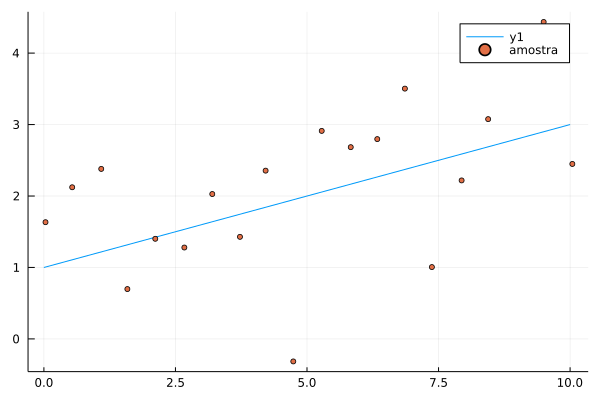

In [3]:
Random.seed!(1200)
x_org = [0.0, 10.0]
y_org = b .+ m * x_org
data_x = collect(range(0.0,10.0, length=N)) + rand(N)/N
data_y = b .+ m * data_x .+ rand(Normal(0,σ), N)
plot(x_org, y_org)
scatter!(data_x, data_y, markersize=3, label="amostra")

### Determinando os parâmetros

In [4]:
X = [ones(N) data_x]
β = X \ data_y

2-element Vector{Float64}:
 1.2146358770000467
 0.1966434395440901

### Visualizando o resultado

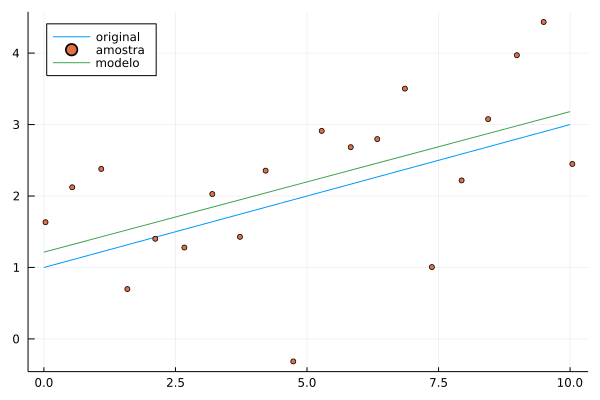

In [5]:
plot(x_org, y_org, label="original", legend=:topleft)
scatter!(data_x, data_y, markersize=3, label="amostra")
plot!(x_org, β[1] .+ β[2] * x_org, label="modelo")

### Intervalos de confiança dos parâmetros

In [6]:
Cov_β = σ^2 * inv(X' * X) 

2×2 Matrix{Float64}:
  0.186834   -0.0272305
 -0.0272305   0.00541896

In [7]:
println("Valores originais: β₀=$b, β₁=$m")
println("CI 68% para β₀: [$(round(β[1] - Cov_β[1,1],digits=2)), $(round(β[1] + Cov_β[1,1],digits=2))]")
println("CI 68% para β₁: [$(round(β[2] - Cov_β[2,2],digits=2)), $(round(β[2] + Cov_β[2,2],digits=2))]")
println("CI 95% para β₀: [$(round(β[1] - 2Cov_β[1,1],digits=2)), $(round(β[1] + 2Cov_β[1,1],digits=2))]")
println("CI 95% para β₁: [$(round(β[2] - 2Cov_β[2,2],digits=2)), $(round(β[2] + 2Cov_β[2,2],digits=2))]")


Valores originais: β₀=1.0, β₁=0.2
CI 68% para β₀: [1.03, 1.4]
CI 68% para β₁: [0.19, 0.2]
CI 95% para β₀: [0.84, 1.59]
CI 95% para β₁: [0.19, 0.21]


### Variância do modelo e intervalos de confiança

In [8]:
Var_y = [[1; x] ⋅ (Cov_β * [1; x]) for x in data_x]

20-element Vector{Float64}:
 0.18518057818459924
 0.15910901965559962
 0.1339217931739317
 0.11408032615654948
 0.09583685247853407
 0.08006915694846892
 0.06805200819596244
 0.05914268637475511
 0.05356900502168228
 0.05044127928640933
 0.05035209371734546
 0.05352383202928997
 0.0593039291214108
 0.06825468872124137
 0.07988973038954705
 0.09599486049600142
 0.11329933597826097
 0.13513313334304589
 0.1584133877366996
 0.1864323029906652

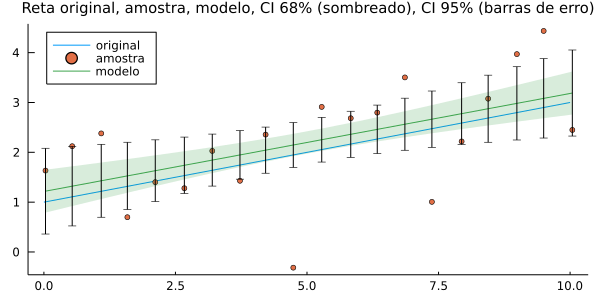

In [9]:
plot(x_org, y_org, label="original", size=(600,300), titlefont=10,
    title="Reta original, amostra, modelo, CI 68% (sombreado), CI 95% (barras de erro)", )
scatter!(data_x, data_y, markersize=3, label="amostra")
plot!(data_x,β[1] .+ β[2] * data_x, grid=false, yerror=2*sqrt.(Var_y),
    ribbon=sqrt.(Var_y), fillalpha=0.2, label="modelo", legend=:topleft)

### Utilizando o desvio padrão corrigido da amostra

* Como a amostra foi obtida de maneira sintética, conhecemos o desvio padrão associado a distribuição dos erros.

* Mas em geral isso não está disponível.

* Nesse caso, podemos aproximá-lo com o desvio padrão corrigido $s_q$ da amostra.

* Observe que $s_q$ fica bem próximo do valor original de $\sigma$ e que o desvio padrão não-corrigido da amostra fica ligeiramente distante.

In [10]:
s_q = √(sum(abs2,  data_y .- β[1] .- β[2] * data_x)/(N-2))
println("Desvio padrão original: $σ")
println("Desvio padrão corrigido da amostra: $(round(s_q, digits=3))")
println("Desvio padrão não corrigido da amostra: $(round(s_q * √((N-2)/N),digits=3))")

Desvio padrão original: 1.0
Desvio padrão corrigido da amostra: 0.975
Desvio padrão não corrigido da amostra: 0.925


In [11]:
Cov_q = s_q^2 * inv(X' * X)
Var_q = [[1; x] ⋅ (Cov_q * [1; x]) for x in data_x]

20-element Vector{Float64}:
 0.1761235696335053
 0.15132714660117805
 0.12737180376443213
 0.1085007643059462
 0.0911495618300367
 0.07615304951284868
 0.06472364824486904
 0.056250073005242644
 0.05094899518419643
 0.047974243583725054
 0.04788941999727061
 0.05090603156053157
 0.056403429520255795
 0.0649164158555832
 0.07598239853878773
 0.09129984182343501
 0.10775797162543216
 0.1285238984209904
 0.1506655373875729
 0.17731407375226546

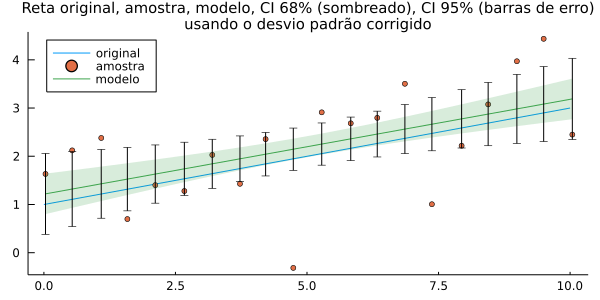

In [12]:
plot(x_org, y_org, label="original", size=(600,300), titlefont=10,
    title="Reta original, amostra, modelo, CI 68% (sombreado), CI 95% (barras de erro)\nusando o desvio padrão corrigido", )
scatter!(data_x, data_y, markersize=3, label="amostra")
plot!(data_x,β[1] .+ β[2] * data_x, grid=false, yerror=2*sqrt.(Var_q),
    ribbon=sqrt.(Var_q), fillalpha=0.2, label="modelo", legend=:topleft)

## Exemplo salário e grau de instrução

* Vamos, agora, refazer o exemplo da relação entre o salário anual médio e o grau de instrução, dos EUA.

* Dados obtidos de [US Bureau of Labor Statistics: Learn more, earn more: Education leads to higher wages, lower unemployment](https://www.bls.gov/careeroutlook/2020/data-on-display/education-pays.htm).

| Nível de instrução  | Média de salário semanal (USD\\$) | Taxa de desemprego (%)|
| ---                  | ---  | --- |
| Doutorado            | 1883 | 1,1 |
| Profissional         | 1861 | 1,6 |
| Mestrado             | 1497 | 2,0 |
| Graduação            | 1248 | 2,2 |
| Associado*            |  887 | 2,7 |
| Graduação incompleta |  833 | 3.3 |
| Ensino Médio         |  746 | 3,7 |
| Ensino Fundamental   |  592 | 5,4 |

* *Associado* é um grau conferido em algumas instituições de nível superior, em cursos de dois a três anos.

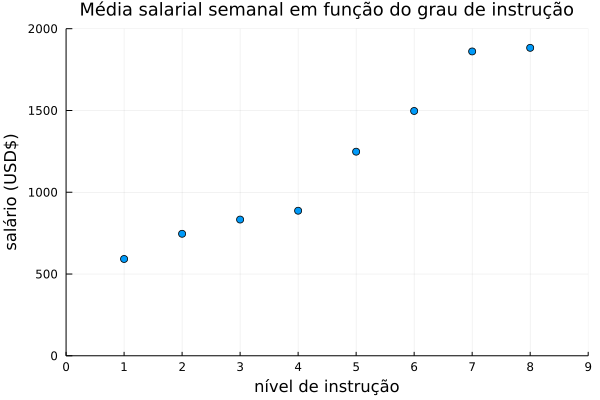

In [13]:
data_y = [592, 746, 833, 887, 1248, 1497, 1861, 1883]
plot(data_y, seriestype = :scatter, xlims=(0,9), ylims=(0,2000),
    xticks=0:9, xaxis = "nível de instrução", yaxis="salário (USD\$)", 
    title="Média salarial semanal em função do grau de instrução", 
    titlefont=12, legend=false)

In [14]:
N = 8
data_x = collect(1:N)
X = [ones(N) data_x]
β = X\data_y
s_q = √(sum(abs2,  data_y .- β[1] .- β[2] * data_x)/(N-2))
Cov_q = s_q^2 * inv(X' * X)
Var_q = [[1; x] ⋅ (Cov_q * [1; x]) for x in data_x]

8-element Vector{Float64}:
 6169.9875992063535
 4054.563279478461
 2644.280399659866
 1939.1389597505686
 1939.1389597505686
 2644.2803996598677
 4054.5632794784633
 6169.987599206355

* Observe que não há muita diferença ao usarmos o fator da distribuição de Student no caso do intervalor de confiança de 68%, mas há uma diferença razoável no de 95%.

In [15]:
fator = [quantile(TDist(N-2),q) for q = (0.84, 0.975)]


2-element Vector{Float64}:
 1.0839756791279644
 2.446911851144969

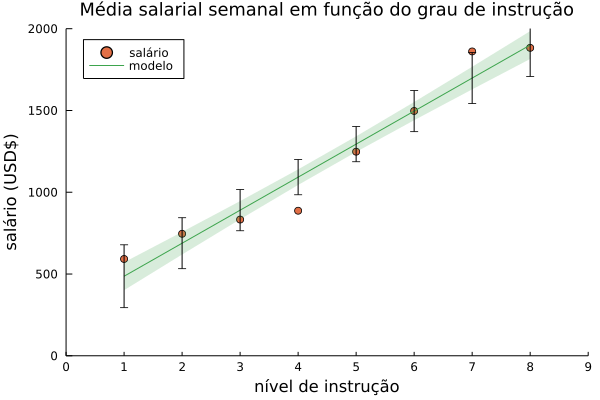

In [16]:
plot(data_y, seriestype = :scatter, xlims=(0,N+1), ylims=(0,2000), color=2,
    xticks=0:N+1, xaxis = "nível de instrução", yaxis="salário (USD\$)", 
    label="salário", title="Média salarial semanal em função do grau de instrução", 
    titlefont=12, legend=:topleft)
plot!(data_x,β[1] .+ β[2] * data_x, grid=false, yerror=fator[2]*sqrt.(Var_q),
    ribbon=fator[1]*sqrt.(Var_q), fillalpha=0.2, label="modelo", color=3, legend=:topleft)

* **Observação:** Devo ressaltar, novamente, que o eixo "nível de instrução" não está associado a uma unidade de medida relevante, sendo o posicioamento dos dados um tanto arbitrário. Portanto, o resultado acima deve ser visto com cautela, apenas para efeitos ilustrativos.

## Exercícios

1. Faça as contas de que 
$$ \operatorname{Cov}(\boldsymbol\beta) = \operatorname{Cov}(\boldsymbol\beta - \hat{\boldsymbol\beta}) = \operatorname{Cov}((X^TX)^{-1}X^T\boldsymbol{\epsilon}).
$$

2. Obtenha $\operatorname{Var}(\boldsymbol\beta)$ explicitamente em termos de $N$ e de $(x_i)_{i=1}^N$.

3. No caso de apenas duas amostras, com $x_2 - x_1 = d$ denotando a distância entre os dois pontos/momentos/condições de medição, escreva $\operatorname{Var}(\boldsymbol\beta)$ explicitamente em função de $d$ e $x_1$, observe a influência da distância $d$ na variância e encontre os limites dessa variância quanto $d\searrow 0$ e $d\nearrow \infty$.

4. Refaça os exercícios do caderno "Modelos redutíveis ao caso linear nos parâmetros e aplicações", calculando e exibindo os intervalos de confiança em relação às variáveis usadas para linearizar os problemas.

## Referências

* Morris H. DeGroot, Mark J Schervish, "Probability and Statistics", Pearson Education  2012.

* John R. Taylor, An Introduction to Error Analysis. The Study of Uncertainties in Physical Measurements. University Science Books, 1997.

<!--NAVIGATOR-->

---
[<- 5.1. Erros e incertezas](05.01-Erros_e_incertezas.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [5.3. Propagação de incertezas ->](05.03-Propagacao_incertezas.ipynb)